<h1>Analizando algoritmos de ordenamiento</h1>

In [3]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [4]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [5]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[8 4 3 9 6 5 2 0 7 1]
[0 1 2 3 4 5 6 7 8 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [6]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [7]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [8]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [9]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [10]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [11]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [12]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [13]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 119


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [14]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

In [15]:
print exper_analysis(10)

[2, 2, 11, 23, 29, 44, 44, 47, 74, 113]


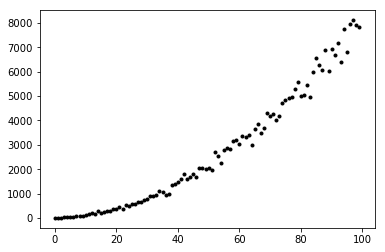

In [16]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

#Actividad
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

# Punto 1: Insertion Sort


Analisis para el tiempo de ejecucion:

In [29]:
import time
import random as rnd

def tiempoEjecucion(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()
        right_insertion_sort(l)
        toc = time.clock()
        results.append((toc-tic)*100000000)
    return results

In [30]:
print tiempoEjecucion(10)

[710.5620312586325, 434.23235354111966, 789.5133677493504, 789.5133677493504, 907.9403724854274, 1144.7943819575812, 1342.172726026547, 1539.551064411171, 1815.8807449708547, 2052.7347544430086]


Analisis para el tiempo teorico:

In [31]:
import time

def tiempoTeorico(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        #tiempo inicial de ejecucion
        tic = time.clock()
        #Llamado al algoritmo
        right_insertion_sort(l)
        #Tiempo final de ejecucion
        toc = time.clock()
        results.append((toc-tic)*100000000)
        
    return results

In [32]:
print tiempoTeorico(10)

[828.9890359947094, 473.70802178647864, 671.0863630132735, 750.0376966618205, 1026.3673772215043, 1065.8430454668633, 1263.221389535829, 1539.551067253342, 1855.3564132162137, 2092.2104226883675]


# Grafica: Numero de operaciones, tiempo de ejecucion y tiempo teorico

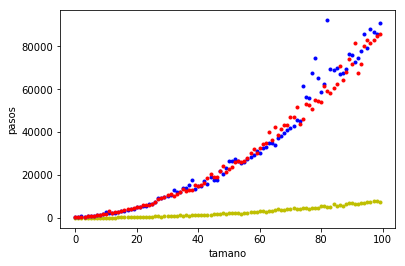

In [36]:
pl.clf()
xname = pl.xlabel('tamano')
yname = pl.ylabel('pasos')
x = np.arange(100)
#Numero de operaciones 
y = np.array(exper_analysis(100)) 
pl.plot(x, y, 'k.', color ='y')
#Tiempo de ejecucion 
z = np.array(tiempoEjecucion(100))
pl.plot(x, z, 'k.', color='b')
#Tiempo teorico
w = np.array(tiempoTeorico(100))
pl.plot(x, w, 'k.', color='r')

# Punto 2: Merge Sort

Algoritmo Merge Sort:

In [61]:
#Tomado de http://interactivepython.org/courselib/static/pythonds/SortSearch/TheMergeSort.html
def mergeSort(alist):
    
      if len(alist)>1:
            
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        
        while i < len(lefthalf) and j < len(righthalf):
           
            if lefthalf[i] < righthalf[j]:
                
                alist[k]=lefthalf[i]
                i=i+1
                
            else:
                alist[k]=righthalf[j]
                j+=1
            k=k+1

        while i < len(lefthalf):
            
            alist[k]=lefthalf[i]
            i+=1
            k+=1

        while j < len(righthalf):
            
            alist[k]=righthalf[j]
            j+=1
            k+=1
    


In [62]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[4 1 5 7 8 9 3 2 6 0]
[0 1 2 3 4 5 6 7 8 9]


# Correctitud

Invariante: Al final de cada llamado a la función, el subarreglo se compone de los elementos originales pero ordenados.

In [63]:
def invariante(A, inicial_A):
       
    inicial_A.sort()
    
    print A == inicial_A
    return A == inicial_A



In [64]:
print invariante([1, 2, 3, 4], [4, 3, 2, 1])
print invariante([1, 2, 3, 4], [6, 7, 8, 9])

True
True
False
False


Merge Sort evaluando la invariante en fase de inicialización, mantenimiento y terminación.

In [65]:
def right_mergeSort(alist):
    inicial_A = list(alist)
    try:
        if len(alist)>1:
            mid = len(alist)//2
            mitadIzquierda = alist[:mid]
            mitadDerecha = alist[mid:]
            
            right_mergeSort(mitadIzquierda)
            right_mergeSort(mitadDerecha)
            
            i=0
            j=0
            k=0
            
            while i < len(mitadIzquierda) and j < len(mitadDerecha):
                
                if mitadIzquierda[i] <= mitadDerecha[j]:
                    alist[k]=mitadIzquierda[i]
                    i+=1
                else:
                    alist[k]=mitadDerecha[j]
                    j+=1
                k=k+1

            while i < len(mitadIzquierda):
                alist[k]=mitadIzquierda[i]
                i+=1
                k+=1

            while j < len(mitadDerecha):
                alist[k]=mitadDerecha[j]
                j+=1
                k+=1
                
            assert invariante(alist,inicial_A)
            
    except  AssertionError:
        
        print "Error en el invariante de ciclo!"
        print "Original A=", inicial_A
        print "otro", mitadIzquierda+mitadDerecha

In [89]:
B = [6, 2, 3, 1, 8, 4, 5, 7, 9]
C = list(B)
print C
right_mergeSort(C)
print C

[6, 2, 3, 1, 8, 4, 5, 7, 9]
True
True
True
True
True
True
True
True
[1, 2, 3, 4, 5, 6, 7, 8, 9]


Análisis: tiempo de ejecución

In [90]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def mergeSort(alist, acct):
    
    if len(alist)>1:
        
        acct.count()
        mid = len(alist)//2;acct.count()
        
        mitadIzquierda = alist[:mid];acct.count()
        mitadDerecha = alist[mid:];acct.count()

        acct_mergeSort(mitadIzquierda,acct);acct.count()
        acct_mergeSort(mitadDerecha,acct);acct.count()

        i=0;acct.count()
        j=0;acct.count()
        k=0;acct.count()
        
        while i < len(mitadIzquierda) and j < len(mitadDerecha):
            acct.count()
            
            if mitadIzquierda[i] <= mitadDerecha[j]:
                
                acct.count()
                alist[k]=mitadIzquierda[i];acct.count()
                i+=1;acct.count()
                
            else:
                acct.count()
                alist[k]=mitadDerecha[j];acct.count()
                j+=1;acct.count()
            k+=1;acct.count()
        acct.count()
        
        while i < len(mitadIzquierda):
            
            acct.count()
            alist[k]=mitadIzquierda[i];acct.count()
            i+=1;acct.count()
            k+=1;acct.count()
        acct.count()
        
        while j < len(mitadDerecha):
            
            acct.count()
            alist[k]=mitadDerecha[j];acct.count()
            
            j+=1;acct.count()
            k+=1;acct.count()
            
        acct.count()
        
    acct.count()

In [78]:
A = [69,46,52,35,15,45,68,98,78,11]
acct = Counter()
A = mergeSort(A, acct)
print A
acct.print_steps();

None
Number of steps = 286


In [87]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        mergeSort(l, acct)
        results.append(acct.steps)
    return results

In [88]:
print exper_analysis(10)

[1, 1, 24, 51, 79, 111, 144, 178, 212, 248]


# Punto 3: Algoritmo Quick Sort